# 共通リスク比のMantel-Haenszel的推定量と最尤推定量の関係

* 黒木玄
* 2022-04-01
$
\newcommand\op{\operatorname}
$

## 公式

$k$ 番目の分割表を

$$
\begin{bmatrix}
a_k & b_k \\
c_k & d_k \\
\end{bmatrix}
$$

と書き, この各行が二項分布に従うという統計モデルを考える.

### 共通リスク比の最尤推定量

共通のリスク比 $\rho$ の最尤推定量は以下のように記述される.

$m_k = a_k + b_k$, $n_k = c_k + d_k$ とおく.

$y = \Delta_k(x)$ を次の逆函数として定める:

$$
x = \frac{(a_k - y)(n_k + y)}{(m_k - y)(c_k + y)}.
$$

$y = \Delta_k(x)$ を $\Delta_k(\infty)=-c_k$, $\Delta_k(0)=a_k$ を満たす単調減少函数として定める(2次方程式の解として計算可能).

共通リスク比の最尤推定量 $\hat\rho$ は次の $x$ に関する方程式の解:

$$
\sum_{k=1}^K \Delta_k(x) = 0.
$$

仮説 $\rho = \rho_0$ について, $\Delta_{k,0} = \Delta_k(\rho_0)$ とおき, 自由度1のχ²検定統計量を次のように定める: 

$$
Z^2 = \frac
{\left( \sum_{k=1}^K \Delta_{k,0} \right)^2}
{\sum_{k=1}^K\left(
1 / (a_k - \Delta_{k,0}) -
1 / (m_k - \Delta_{k,0}) +
1 / (c_k + \Delta_{k,0}) -
1 / (n_k + \Delta_{k,0})
\right)^{-1}}.
$$

これらを使うと共通リスク比 $\rho$ に関するP値や信頼区間を構成できる.

### Mantel-Haenszelの共通オッズ比の推定量の共通リスク比版

$m_k = a_k + b_k$, $n_k = c_k + d_k$ とおく.

$y = \Delta_k(x)$ の一次函数近似:

$$
y = -\frac{m_k c_k}{b_k+d_k} x + \frac{n_k a_k}{b_k+d_k}.
$$

この一次函数は $x = (n_k a_k)/(m_k c_k)$, $x = 1$ のそれぞれで $y = \Delta_k(x)$ と同じ値 $0$, $(n_k a_k - m_k c_k)/(b_k+d_k)$ になり, この条件で特徴付けられる.

最尤法の方程式の一次方程式による近似:

$$
-\left(\sum_{k=1}^K \frac{m_k c_k}{b_k+d_k}\right) x + \sum_{k=1}^K \frac{n_k a_k}{b_k+d_k} = 0
$$

この方程式の解を共通リスク比の推定量として採用する:

$$
\hat\rho_{\op{MH}} =
\frac{\sum_{k=1}^K n_k a_k / (b_k+d_k)}{\sum_{k=1}^K m_k c_k / (b_k+d_k)}.
$$

共通オッズ比の場合のMantel-Haenszel推定量の対数の分散のRobins-Breslow-Greenland推定量のこの場合での類似物は以下になる:

$$
\op{var}(\log\hat\rho_{\op{MH}}) \approx
\frac{\sum_{k=1}^K P_k R_k}{2R^2} +
\frac{\sum_{k=1}^K (P_k S_k + Q_k R_k)}{2RS} +
\frac{\sum_{k=1}^K Q_k S_k}{2S^2}
$$

ここで,

$$
P_k = \frac{n_k - a_k}{b_k + d_k}, \quad
Q_k = \frac{m_k - c_k}{b_k + d_k}, \quad
R_k = \frac{n_k a_k}{b_k + d_k}, \quad
S_k = \frac{m_k c_k}{b_k + d_k}, \quad
R = \sum_{k=1}^K R_k, \quad
S = \sum_{k=1}^K S_k.
$$

これらを使うと共通リスク比 $\rho$ に関するP値や信頼区間を構成できる.

### 共通リスク比のNurminen (1981)の推定量

$m_k = a_k + b_k$, $n_k = c_k + d_k$ とおく.

以下の公式は K. J. Rothman, T. L. Greenland, and T. Lash, Modern Epidemiology, 3rd ed., 2008 のpp.329-330の公式\[15-20\]と\[15-22\]にある.

共通リスク比のNurminenの推定量:

$$
\hat\rho_{\op{Nurminen}} =
\frac{\sum_{k=1}^K n_k a_k / (m_k + n_k)}{\sum_{k=1}^N m_k c_k / (m_k + n_k)}
$$

$\hat\rho_{\op{MH}}$ との違いは $b_k + d_k$ と $m_k + n_k$ の違いに過ぎない.

Nurminenの推定量の分散の推定量:

$$
\op{var}(\log\hat\rho_{\op{Nurminen}}) =
\frac
{\sum_{k=1}^K\left((a_k + c_k)m_k n_k/(m_k+n_k)^2 - a_k c_k/(m_k+n_k)\right)}
{\left(\sum_{k=1}^K n_k a_k / (m_k + n_k)\right)\left(\sum_{k=1}^N m_k c_k / (m_k + n_k)\right)}.
$$

これらを使うと共通リスク比 $\rho$ に関するP値や信頼区間を構成できる.

## 数値例

In [1]:
using Distributions
using StatsPlots
default(fmt = :png)
using Roots

In [2]:
# A = [
#     a b
#     c d
# ]

safediv(x, y) = x == 0 ? x/one(y) : x/y
safesqrt(x) = √max(0, x)

riskratio(a, b, c, d) = safediv(a*(c+d), (a+b)*c)
riskratio(A::AbstractVecOrMat) = riskratio(A'...)

function Delta(a, b, c, d, ρ)
    m, n = a + b, c + d
    A, B, C = 1 - ρ, n - a + ρ*(m - c), -a*n + ρ*m*c
    safediv(2C, -B - safesqrt(B^2 - 4A*C))
end
Delta(A, ρ) = Delta(A'..., ρ)

function mhlike_approx_Delta(a, b, c, d, ρ)
    m, n = a + b, c + d
    -(m*c/(b + d))*ρ + a*n/(b + d)
end
mhlike_approx_Delta(A::AbstractVecOrMat, ρ) = mhlike_approx_Delta(A'..., ρ)

function nurminen_approx_Delta(a, b, c, d, ρ)
    m, n = a + b, c + d
    N = m + n
    -(m*c/N)*ρ + a*n/N
end
nurminen_approx_Delta(A::AbstractVecOrMat, ρ) = nurminen_approx_Delta(A'..., ρ)

eachmatrix(A::AbstractArray{<:Any, 3}) = eachslice(A; dims=3)

function maximum_likelihood_equation(A::AbstractArray{<:Any, 3}, x)
    sum(A -> Delta(A, x), eachmatrix(A))
end

function mhlike_approx_maximum_likelihood_equation(A::AbstractArray{<:Any, 3}, x)
    sum(A -> mhlike_approx_Delta(A, x), eachmatrix(A))
end

function nurminen_approx_maximum_likelihood_equation(A::AbstractArray{<:Any, 3}, x)
    sum(A -> nurminen_approx_Delta(A, x), eachmatrix(A))
end

function maximum_linkelihood_estimator(A::AbstractArray{<:Any, 3})
    f(t) = maximum_likelihood_equation(A, exp(t))
    logrhohat = find_zero(f, 0.0, Order2())
    rhohat = exp(logrhohat)
end

function mhlike_estimator(A::AbstractArray{<:Any, 3})
    num = sum(A -> ((a, b, c, d) = A'; a*(c+d)/(b+d)), eachmatrix(A))
    den = sum(A -> ((a, b, c, d) = A'; (a+b)*c/(b+d)), eachmatrix(A))
    num/den
end

function nurminen_estimator(A::AbstractArray{<:Any, 3})
    num = sum(A -> ((a, b, c, d) = A'; a*(c+d)/(a+b+c+d)), eachmatrix(A))
    den = sum(A -> ((a, b, c, d) = A'; (a+b)*c/(a+b+c+d)), eachmatrix(A))
    num/den
end

nurminen_estimator (generic function with 1 method)

In [3]:
function varDelta(a, b, c, d, ρ)
    Δ = Delta(a, b, c, d, ρ)
    1/(1/(a - Δ) - 1/(a + b - Δ) + 1/(c + Δ) - 1/(c + d + Δ))
end
varDelta(A::AbstractVecOrMat, ρ) = varDelta(A'..., ρ)

function chisq_score(A::AbstractArray{<:Any, 3}, ρ = 1.0)
    num = sum(A -> Delta(A, ρ), eachmatrix(A))^2
    den = sum(A -> varDelta(A, ρ), eachmatrix(A))
    num/den
end

function pvalue_score(A::AbstractArray{<:Any, 3}, ρ = 1.0)
    chisq = chisq_score(A, ρ)
    ccdf(Chisq(1), chisq)
end

function ci_score(A::AbstractArray{<:Any, 3}, α = 0.05)
    f(t) = pvalue_score(A, exp(t)) - α
    logci = find_zeros(f, -1e1, 1e1)
    exp(first(logci)), exp(last(logci))
end

function scoretest(A::AbstractArray{<:Any, 3}; ρ₀ = 1.0, α = 0.05)
    common_risk_ratio = maximum_linkelihood_estimator(A)
    chisq = chisq_score(A, ρ₀)
    df = 1
    p_value = ccdf(Chisq(df), chisq)
    conf_int = ci_score(A, α)
    (; common_risk_ratio, ρ₀, p_value, α, conf_int, chisq, df)
end

scoretest (generic function with 1 method)

In [4]:
function _mhrbglike(A::AbstractArray{<:Any, 3})
    @views a, b, c, d  = A[1,1,:], A[1,2,:], A[2,1,:], A[2,2,:]
    abcd = zip(a, b, c, d)
    R = sum(((a, b, c, d),) -> a*(c+d)/(b+d), abcd)
    S = sum(((a, b, c, d),) -> (a+b)*c/(b+d), abcd)
    logRR = log(R) - log(S)
    sumPR = sum(((a, b, c, d),) -> (c+d-a)*a*(c+d)/(b+d)^2, abcd)
    sumPSplusQR = sum(((a, b, c, d),) -> ((c+d-a)*(a+b)*c + (a+b-c)*a*(c+d))/(b+d)^2, abcd)
    sumQS = sum(((a, b, c, d),) -> (a+b-c)*(a+b)*c/(b+d)^2, abcd)
    SE² = sumPR/(2R^2) + sumPSplusQR/(2(R*S)) + sumQS/(2S^2)
    SE = √SE²
    (; logRR, SE)
end

function pvalue_mhrbglike(A::AbstractArray{<:Any, 3}, ρ = 1.0)
    (; logRR, SE) = _mhrbglike(A)
    normal = Normal(logRR, SE)
    min(1, 2cdf(normal, log(ρ)), 2ccdf(normal, log(ρ)))
end

function ci_mhrbglike(A::AbstractArray{<:Any, 3}, α = 0.05)
    (; logRR, SE) = _mhrbglike(A)
    normal = Normal(logRR, SE)
    exp.(quantile.(normal, (α/2, 1 - α/2)))
end

function mhrbglike(A::AbstractArray{<:Any, 3}; ρ₀ = 1.0, α = 0.05)
    (; logRR, SE) = _mhrbglike(A)
    common_risk_ratio = exp(logRR)
    normal = Normal(logRR, SE)
    p_value = min(1, 2cdf(normal, log(ρ₀)), 2ccdf(normal, log(ρ₀)))
    conf_int = exp.(quantile.(normal, (α/2, 1 - α/2)))
    (; common_risk_ratio, ρ₀, p_value, α, conf_int)
end

mhrbglike (generic function with 1 method)

In [5]:
function _nurminen(A::AbstractArray{<:Any, 3})
    @views a, b, c, d  = A[1,1,:], A[1,2,:], A[2,1,:], A[2,2,:]
    abcd = zip(a, b, c, d)
    R = sum(((a, b, c, d),) -> a*(c+d)/(a+b+c+d), abcd)
    S = sum(((a, b, c, d),) -> (a+b)*c/(a+b+c+d), abcd)
    logRR = log(R) - log(S)
    num = sum(((a, b, c, d),) -> (a+c)*(a+b)*(c+d)/(a+b+c+d)^2 - a*c/(a+b+c+d), abcd)
    SE² = num/(R*S)
    SE = √SE²
    (; logRR, SE)
end

function pvalue_nurminen(A::AbstractArray{<:Any, 3}, ρ = 1.0)
    (; logRR, SE) = _nurminen(A)
    normal = Normal(logRR, SE)
    min(1, 2cdf(normal, log(ρ)), 2ccdf(normal, log(ρ)))
end

function ci_nurminen(A::AbstractArray{<:Any, 3}, α = 0.05)
    (; logRR, SE) = _nurminen(A)
    normal = Normal(logRR, SE)
    exp.(quantile.(normal, (α/2, 1 - α/2)))
end

function nurminen(A::AbstractArray{<:Any, 3}; ρ₀ = 1.0, α = 0.05)
    (; logRR, SE) = _nurminen(A)
    common_risk_ratio = exp(logRR)
    normal = Normal(logRR, SE)
    p_value = min(1, 2cdf(normal, log(ρ₀)), 2ccdf(normal, log(ρ₀)))
    conf_int = exp.(quantile.(normal, (α/2, 1 - α/2)))
    (; common_risk_ratio, ρ₀, p_value, α, conf_int)
end

nurminen (generic function with 1 method)

A = [10 5; 5 10;;; 10 10; 5 20;;; 10 5; 10 10;;; 10 5; 20 10]
riskratio.(eachmatrix(A)) = [2.0, 2.5, 1.3333333333333333, 1.0]
maximum_linkelihood_estimator(A) = 1.329596356066259
mhlike_estimator(A) = 1.3478260869565217
nurminen_estimator(A) = 1.4632911392405064
scoretest(A) = (common_risk_ratio = 1.329596356066259, ρ₀ = 1.0, p_value = 0.03973709392532212, α = 0.05, conf_int = (1.0124214402874694, 1.756507933548418), chisq = 4.229074889867842, df = 1)
mhrbglike(A) = (common_risk_ratio = 1.3478260869565217, ρ₀ = 1.0, p_value = 0.03508380733925476, α = 0.05, conf_int = (1.0211010947444652, 1.7790943228154597))
nurminen(A) = (common_risk_ratio = 1.4632911392405066, ρ₀ = 1.0, p_value = 0.015766343599668085, α = 0.05, conf_int = (1.0742657190465967, 1.9931949053350575))


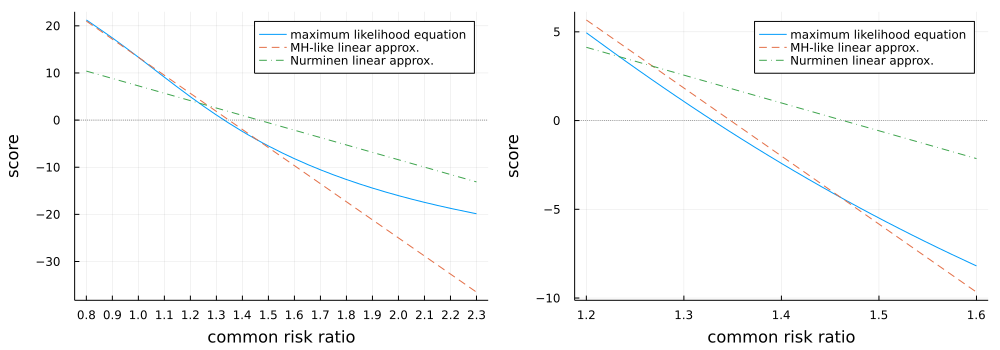

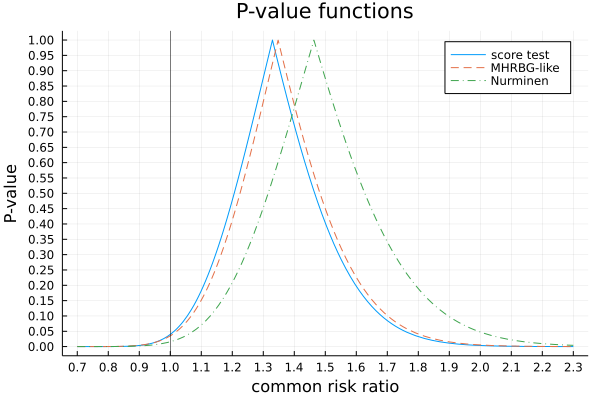

In [6]:
data = [
    10 5 5 10
    10 5 10 20
    10 10 5 10
    10 20 5 10
]

A = reshape(data', 2, 2, :) |> collect

@show A
@show riskratio.(eachmatrix(A))
@show maximum_linkelihood_estimator(A)
@show mhlike_estimator(A)
@show nurminen_estimator(A)
@show scoretest(A)
@show mhrbglike(A)
@show nurminen(A)
flush(stdout)

f(x) = maximum_likelihood_equation(A, x)
g(x) = mhlike_approx_maximum_likelihood_equation(A, x)
h(x) = nurminen_approx_maximum_likelihood_equation(A, x)

P = plot(f, 0.8, 2.3; label="maximum likelihood equation")
plot!(g; label="MH-like linear approx.", ls=:dash)
plot!(h; label="Nurminen linear approx.", ls=:dashdot)
hline!([0]; label="", c=:black, lw=0.5, ls=:dot)
plot!(; xlabel="common risk ratio", ylabel="score")
plot!(; xtick=0.2:0.1:5)

Q = plot(f, 1.2, 1.6; label="maximum likelihood equation")
plot!(g; label="MH-like linear approx.", ls=:dash)
plot!(h; label="Nurminen linear approx.", ls=:dashdot)
hline!([0]; label="", c=:black, lw=0.5, ls=:dot)
plot!(; xlabel="common risk ratio", ylabel="score")
plot!(; xtick=0.2:0.1:5)

plot(P, Q; size=(1000, 350), leftmargin=5Plots.mm, bottommargin=5Plots.mm) |> display

plot(title="P-value functions")
plot!(ρ -> pvalue_score(A, ρ), 0.7, 2.3; label="score test")
plot!(ρ -> pvalue_mhrbglike(A, ρ); label="MHRBG-like", ls=:dash)
plot!(ρ -> pvalue_nurminen(A, ρ); label="Nurminen", ls=:dashdot)
plot!(; xtick=0.1:0.1:5, ytick=0:0.05:1)
vline!([1]; label="", c=:black, lw=0.5)
plot!(; xlabel="common risk ratio", ylabel="P-value")

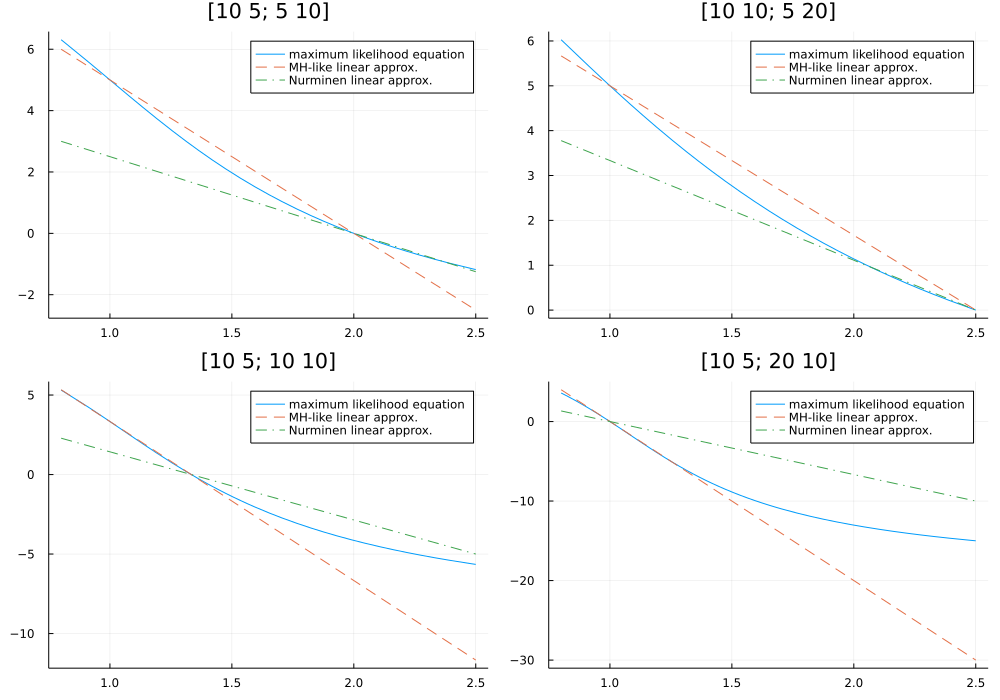

In [7]:
PP = []
for k in axes(A, 3)
    P = plot(x -> Delta(A[:,:,k], x), 0.8, 2.5; label="maximum likelihood equation")
    plot!(x -> mhlike_approx_Delta(A[:,:,k], x); label="MH-like linear approx.", ls=:dash)
    plot!(x -> nurminen_approx_Delta(A[:,:,k], x); label="Nurminen linear approx.", ls=:dashdot)
    title!("$(A[:,:,k])")
    plot!(; size=(500, 350))
    push!(PP, P)
end
plot(PP...; size=(1000, 700), layout=(2, 2))

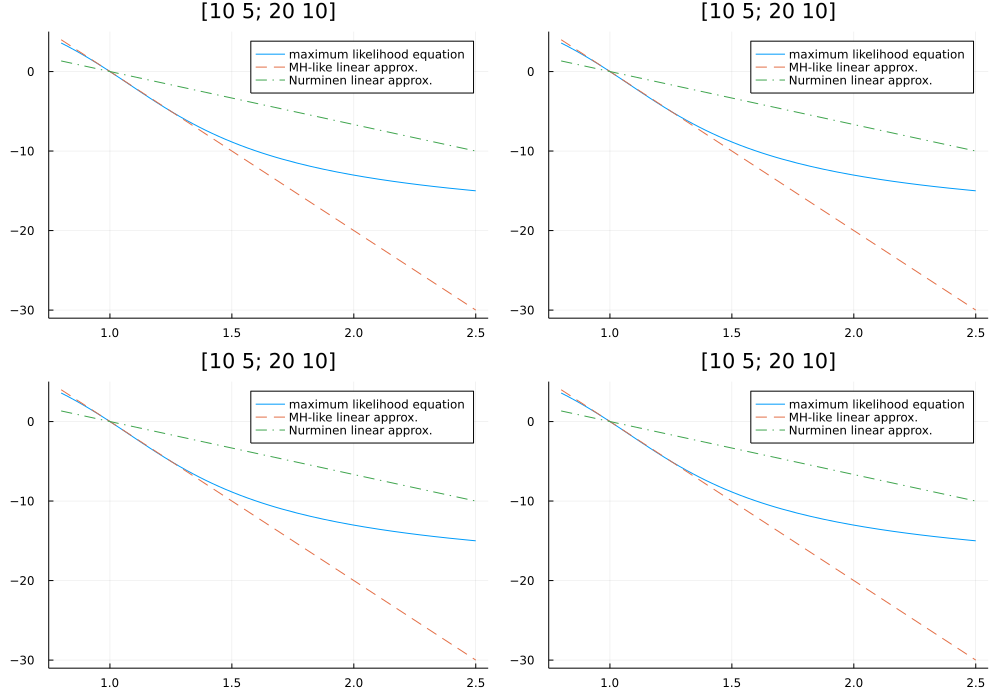

In [8]:
PP = []
for k in axes(A, 3)
    plot(x -> Delta(A[:,:,k], x), 0, 20; label="maximum likelihood equation")
    plot!(x -> mhlike_approx_Delta(A[:,:,k], x); label="MH-like linear approx.", ls=:dash)
    plot!(x -> nurminen_approx_Delta(A[:,:,k], x); label="Nurminen linear approx.", ls=:dashdot)
    title!("$(A[:,:,k])")
    plot!(; size=(500, 350), ylim=(-A[2,1,k], A[1,1,k]))
    push!(PP, P)
end
plot(PP...; size=(1000, 700), layout=(2, 2))

A = [3 104; 9 1059;;; 1 5; 3 86]
riskratio.(eachmatrix(A)) = [3.3271028037383177, 4.944444444444445]
maximum_linkelihood_estimator(A) = 3.671739669657277
mhlike_estimator(A) = 3.638960273379572
nurminen_estimator(A) = 3.6307985972388686
scoretest(A) = (common_risk_ratio = 3.671739669657277, ρ₀ = 1.0, p_value = 0.013620859473889491, α = 0.05, conf_int = (1.274632777364132, 10.517328082429588), chisq = 6.086630620424078, df = 1)
mhrbglike(A) = (common_risk_ratio = 3.6389602733795714, ρ₀ = 1.0, p_value = 0.022239180252285915, α = 0.05, conf_int = (1.2024373702636217, 11.012658287833766))
nurminen(A) = (common_risk_ratio = 3.630798597238868, ρ₀ = 1.0, p_value = 0.022206770279488256, α = 0.05, conf_int = (1.202374441089649, 10.963887790033976))


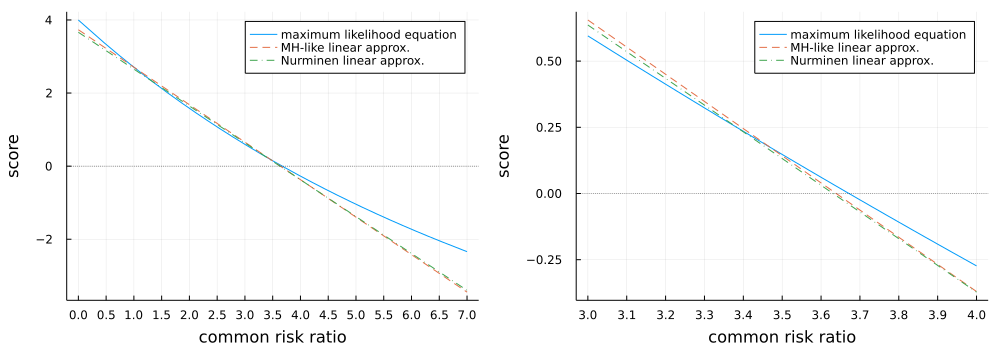

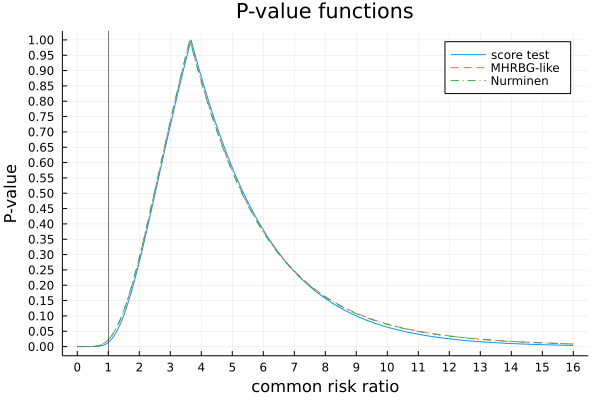

In [9]:
data2 = [
    3 9 104 1059
    1 3   5   86
]
A = reshape(data2', 2, 2, :) |> collect

@show A
@show riskratio.(eachmatrix(A))
@show maximum_linkelihood_estimator(A)
@show mhlike_estimator(A)
@show nurminen_estimator(A)
@show scoretest(A)
@show mhrbglike(A)
@show nurminen(A)
flush(stdout)

f(x) = maximum_likelihood_equation(A, x)
g(x) = mhlike_approx_maximum_likelihood_equation(A, x)
h(x) = nurminen_approx_maximum_likelihood_equation(A, x)

P = plot(f, 0, 7; label="maximum likelihood equation")
plot!(g; label="MH-like linear approx.", ls=:dash)
plot!(h; label="Nurminen linear approx.", ls=:dashdot)
hline!([0]; label="", c=:black, lw=0.5, ls=:dot)
plot!(; xlabel="common risk ratio", ylabel="score")
plot!(; xtick=0:0.5:10)

Q = plot(f, 3, 4; label="maximum likelihood equation")
plot!(g; label="MH-like linear approx.", ls=:dash)
plot!(h; label="Nurminen linear approx.", ls=:dashdot)
hline!([0]; label="", c=:black, lw=0.5, ls=:dot)
plot!(; xlabel="common risk ratio", ylabel="score")
plot!(; xtick=0.2:0.1:10)

plot(P, Q; size=(1000, 350), leftmargin=5Plots.mm, bottommargin=5Plots.mm) |> display

plot(title="P-value functions")
plot!(ρ -> pvalue_score(A, ρ), 0, 16; label="score test")
plot!(ρ -> pvalue_mhrbglike(A, ρ); label="MHRBG-like", ls=:dash)
plot!(ρ -> pvalue_nurminen(A, ρ); label="Nurminen", ls=:dashdot)
plot!(; xtick=0:20, ytick=0:0.05:1)
vline!([1]; label="", c=:black, lw=0.5)
plot!(; xlabel="common risk ratio", ylabel="P-value")

A = [215 96; 229 77;;; 38 21; 33 18;;; 161 132; 174 119;;; 76 88; 88 75;;; 103 26; 105 28;;; 65 55; 67 58;;; 81 32; 75 35;;; 48 112; 63 96;;; 22 38; 21 41;;; 56 81; 51 89;;; 468 229; 480 205]
riskratio.(eachmatrix(A)) = [0.9237703421839678, 0.9953775038520801, 0.9252873563218391, 0.858370288248337, 1.0113695090439276, 1.0105721393034826, 1.0513274336283185, 0.7571428571428571, 1.0825396825396825, 1.122083870044368, 0.9582137733142038]
maximum_linkelihood_estimator(A) = 0.9580533845180524
mhlike_estimator(A) = 0.9581938007572934
nurminen_estimator(A) = 0.9531561312685332
scoretest(A) = (common_risk_ratio = 0.9580533845180524, ρ₀ = 1.0, p_value = 0.05355060113490956, α = 0.05, conf_int = (0.9172610508281895, 1.0006528244860293), chisq = 3.726652909878388, df = 1)
mhrbglike(A) = (common_risk_ratio = 0.9581938007572939, ρ₀ = 1.0, p_value = 0.054166312288121965, α = 0.05, conf_int = (0.9174339206834177, 1.0007645663741846))
nurminen(A) = (common_risk_ratio = 0.9531561312685338, ρ₀ = 1.0, p_

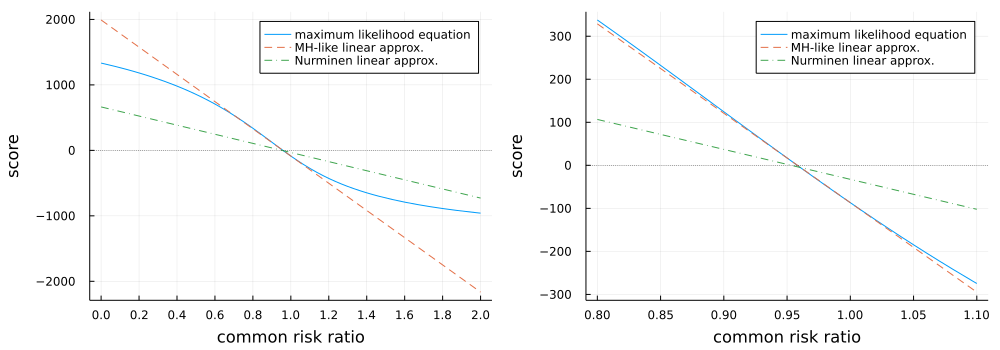

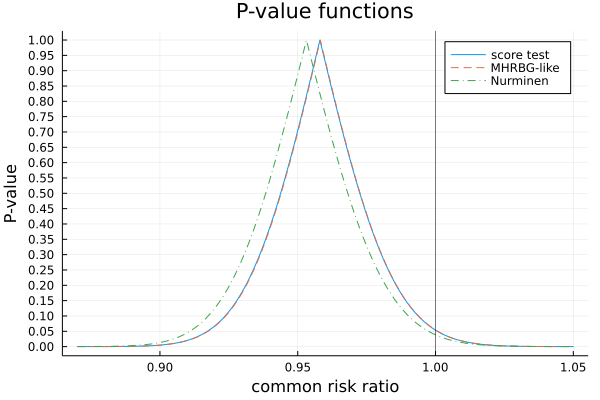

In [10]:
TenStudies = [
    215 229 311-215 306-229
     38  33  59-38   51-33
    161 174 293-161 293-174
     76  88 164-76  163-88
    103 105 129-103 133-105
     65  67 120-65  125-67
     81  75 113-81  110-75
     48  63 160-48  159-63
     22  21  60-22  62-21
     56  51 137-56  140-51
]

ElevenStudies = [
    TenStudies
    468 480 697-468 685-480
]

A = reshape(ElevenStudies', 2, 2, :) |> collect

@show A
@show riskratio.(eachmatrix(A))
@show maximum_linkelihood_estimator(A)
@show mhlike_estimator(A)
@show nurminen_estimator(A)
@show scoretest(A)
@show mhrbglike(A)
@show nurminen(A)
flush(stdout)

f(x) = maximum_likelihood_equation(A, x)
g(x) = mhlike_approx_maximum_likelihood_equation(A, x)
h(x) = nurminen_approx_maximum_likelihood_equation(A, x)

P = plot(f, 0, 2; label="maximum likelihood equation")
plot!(g; label="MH-like linear approx.", ls=:dash)
plot!(h; label="Nurminen linear approx.", ls=:dashdot)
hline!([0]; label="", c=:black, lw=0.5, ls=:dot)
plot!(; xlabel="common risk ratio", ylabel="score")
plot!(; xtick=0:0.2:10)

Q = plot(f, 0.8, 1.1; label="maximum likelihood equation")
plot!(g; label="MH-like linear approx.", ls=:dash)
plot!(h; label="Nurminen linear approx.", ls=:dashdot)
hline!([0]; label="", c=:black, lw=0.5, ls=:dot)
plot!(; xlabel="common risk ratio", ylabel="score")
plot!(; xtick=0:0.05:10)

plot(P, Q; size=(1000, 350), leftmargin=5Plots.mm, bottommargin=5Plots.mm) |> display

plot(title="P-value functions")
plot!(ρ -> pvalue_score(A, ρ), 0.87, 1.05; label="score test")
plot!(ρ -> pvalue_mhrbglike(A, ρ); label="MHRBG-like", ls=:dash)
plot!(ρ -> pvalue_nurminen(A, ρ); label="Nurminen", ls=:dashdot)
plot!(; xtick=0:0.05:20, ytick=0:0.05:1)
vline!([1]; label="", c=:black, lw=0.5)
plot!(; xlabel="common risk ratio", ylabel="P-value")

A = [325 273; 292 321;;; 324 363; 278 323]
riskratio.(eachmatrix(A)) = [1.1409321024419297, 1.0195721152335773]
maximum_linkelihood_estimator(A) = 1.0822193064853316
mhlike_estimator(A) = 1.081901817527301
nurminen_estimator(A) = 1.0794036549560395
scoretest(A) = (common_risk_ratio = 1.0822193064853316, ρ₀ = 1.0, p_value = 0.054431028504551615, α = 0.05, conf_int = (0.9985039018612303, 1.1729579450162875), chisq = 3.699430954389728, df = 1)
mhrbglike(A) = (common_risk_ratio = 1.0819018175273014, ρ₀ = 1.0, p_value = 0.05536585794987301, α = 0.05, conf_int = (0.9981950826994749, 1.1726280394042798))
nurminen(A) = (common_risk_ratio = 1.07940365495604, ρ₀ = 1.0, p_value = 0.06283646705158358, α = 0.05, conf_int = (0.9959168549686193, 1.169889077104905))


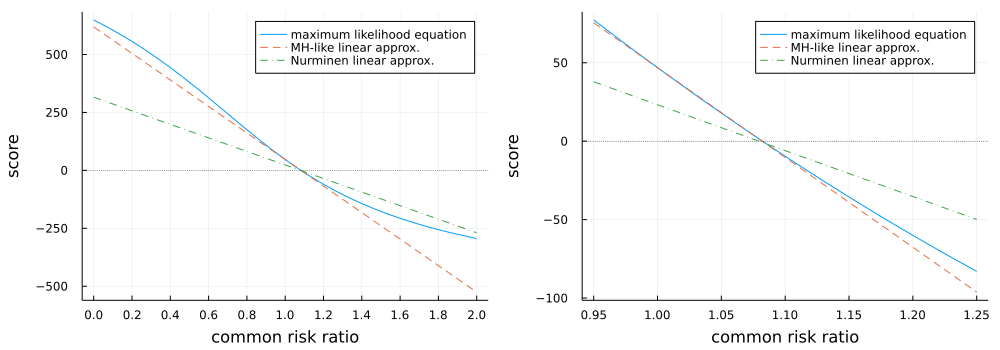

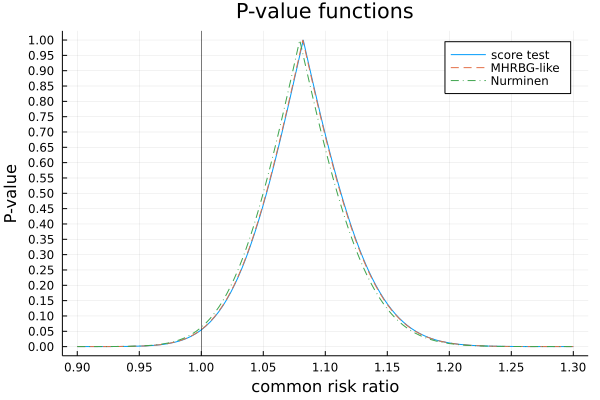

In [11]:
A = [
325  273
292  321
;;;
324  363
278  323
]

@show A
@show riskratio.(eachmatrix(A))
@show maximum_linkelihood_estimator(A)
@show mhlike_estimator(A)
@show nurminen_estimator(A)
@show scoretest(A)
@show mhrbglike(A)
@show nurminen(A)
flush(stdout)

f(x) = maximum_likelihood_equation(A, x)
g(x) = mhlike_approx_maximum_likelihood_equation(A, x)
h(x) = nurminen_approx_maximum_likelihood_equation(A, x)

P = plot(f, 0, 2; label="maximum likelihood equation")
plot!(g; label="MH-like linear approx.", ls=:dash)
plot!(h; label="Nurminen linear approx.", ls=:dashdot)
hline!([0]; label="", c=:black, lw=0.5, ls=:dot)
plot!(; xlabel="common risk ratio", ylabel="score")
plot!(; xtick=0:0.2:10)

Q = plot(f, 0.95, 1.25; label="maximum likelihood equation")
plot!(g; label="MH-like linear approx.", ls=:dash)
plot!(h; label="Nurminen linear approx.", ls=:dashdot)
hline!([0]; label="", c=:black, lw=0.5, ls=:dot)
plot!(; xlabel="common risk ratio", ylabel="score")
plot!(; xtick=0:0.05:10)

plot(P, Q; size=(1000, 350), leftmargin=5Plots.mm, bottommargin=5Plots.mm) |> display

plot(title="P-value functions")
plot!(ρ -> pvalue_score(A, ρ), 0.9, 1.3; label="score test")
plot!(ρ -> pvalue_mhrbglike(A, ρ); label="MHRBG-like", ls=:dash)
plot!(ρ -> pvalue_nurminen(A, ρ); label="Nurminen", ls=:dashdot)
plot!(; xtick=0:0.05:20, ytick=0:0.05:1)
vline!([1]; label="", c=:black, lw=0.5)
plot!(; xlabel="common risk ratio", ylabel="P-value")